### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ  
### Факультет искусственного интеллекта  
### Дисциплина: Инструменты обработки и визуализации данных  
## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6
#### Студент:  Князев Арсений
#### Группа:   ЗФИбд-01-24  
#### Вариант: 26
#### Parkinsons Disease Data Set

### задание 1
___

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
parkinsons = fetch_ucirepo(id=174)

X = parkinsons.data.features
y = parkinsons.data.targets


In [3]:
X["MDVP:Flo"]

0       74.997
1      113.819
2      111.555
3      111.366
4      110.655
        ...   
190     94.261
191     89.488
192     74.287
193     74.904
194     77.973
Name: MDVP:Flo, Length: 195, dtype: float64

In [4]:
data = pd.concat([X[["MDVP:Fhi", "MDVP:Flo", "DFA"]], y], axis=1)
print(data.shape)
data.sample(5)

(195, 4)


,MDVP:Fhi,MDVP:Flo,DFA,status
188,119.167,86.647,0.659132,0
21,172.860,78.128,0.698951,1
146,191.759,151.451,0.793509,1
33,211.604,197.079,0.742133,0
27,208.701,81.737,0.726652,1


### задание 2
____

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MDVP:Fhi  195 non-null    float64
 1   MDVP:Flo  195 non-null    float64
 2   DFA       195 non-null    float64
 3   status    195 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.2 KB


### nan нет, значит удаляем

In [ ]:
features = ["MDVP:Fhi", "MDVP:Flo", "DFA"]

z_scores = np.abs(zscore(data[features]))

outliers = (z_scores > 2.5).any(axis=1)

n_outliers = outliers.sum()
percent_outliers = n_outliers / len(data) * 100

print(f"Удалено точек: {n_outliers} ({percent_outliers:.2f}%)")

data_with_nans = data.copy()
data_with_nans.loc[:, features] = data_with_nans[features].mask(outliers)

Удалено точек: 19 (9.74%)


In [7]:
data_with_nans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MDVP:Fhi  176 non-null    float64
 1   MDVP:Flo  176 non-null    float64
 2   DFA       176 non-null    float64
 3   status    195 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.2 KB


In [8]:
data = data_with_nans.fillna(data_with_nans.median())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MDVP:Fhi  195 non-null    float64
 1   MDVP:Flo  195 non-null    float64
 2   DFA       195 non-null    float64
 3   status    195 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.2 KB


### задание 3
____

In [ ]:
variances = data[["MDVP:Fhi", "MDVP:Flo", "DFA"]].var()

feature_max_var = variances.idxmax()
feature_min_var = variances.idxmin()

print("Максимальная дисперсия:", feature_max_var)
print("Минимальная дисперсия:", feature_min_var)

Максимальная дисперсия: MDVP:Fhi
Минимальная дисперсия: DFA


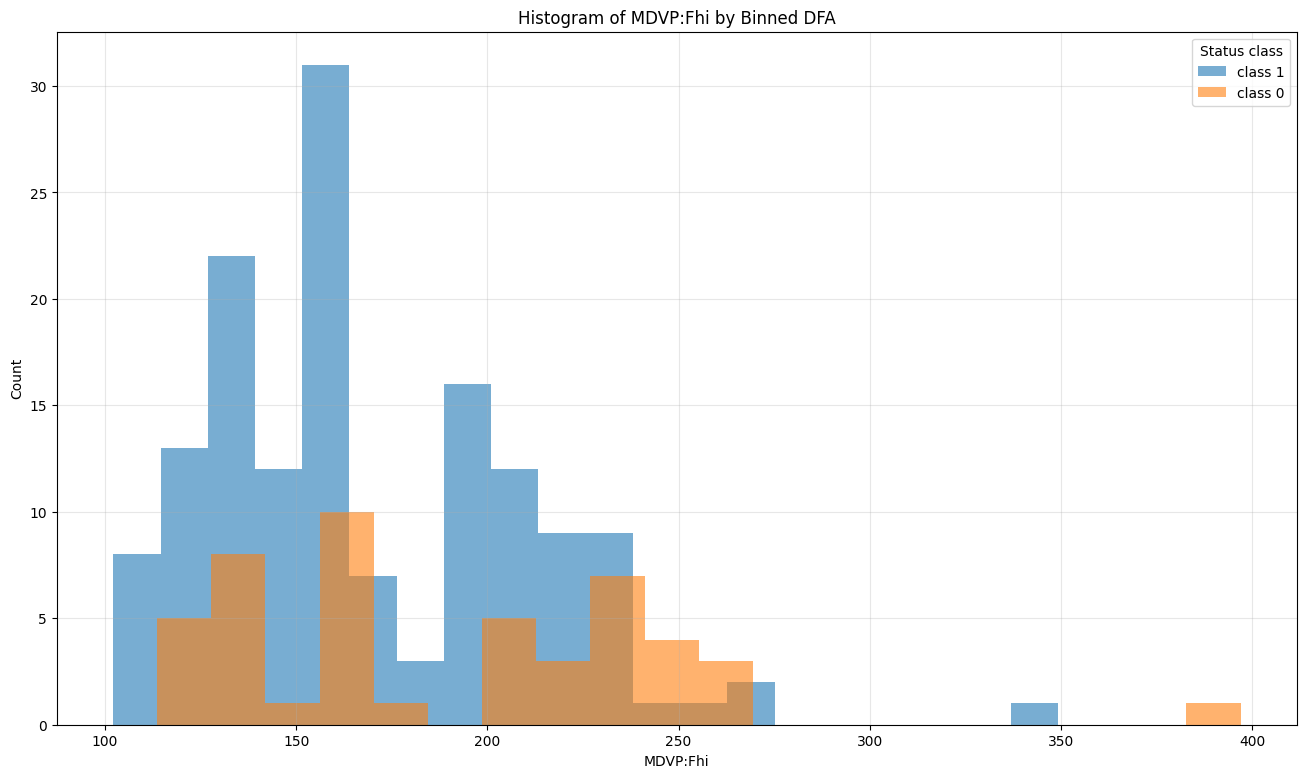

In [ ]:
plt.figure(figsize=(16, 9))

classes = data["status"].unique()
for cls in classes:
    subset = data[data["status"] == cls]
    plt.hist(subset[feature_max_var], bins=20, alpha=0.6, label=f"class {cls}")

plt.title(f"Histogram of {feature_max_var} by Binned {feature_min_var}")
plt.xlabel(feature_max_var)
plt.ylabel("Count")
plt.legend(title="Status class")
plt.grid(alpha=0.3)
plt.show()

### задание 4
___

In [11]:
median_by_class = data.groupby("status")[feature_max_var].median()
median_by_class

status
0    170.3335
1    163.3350
Name: MDVP:Fhi, dtype: float64

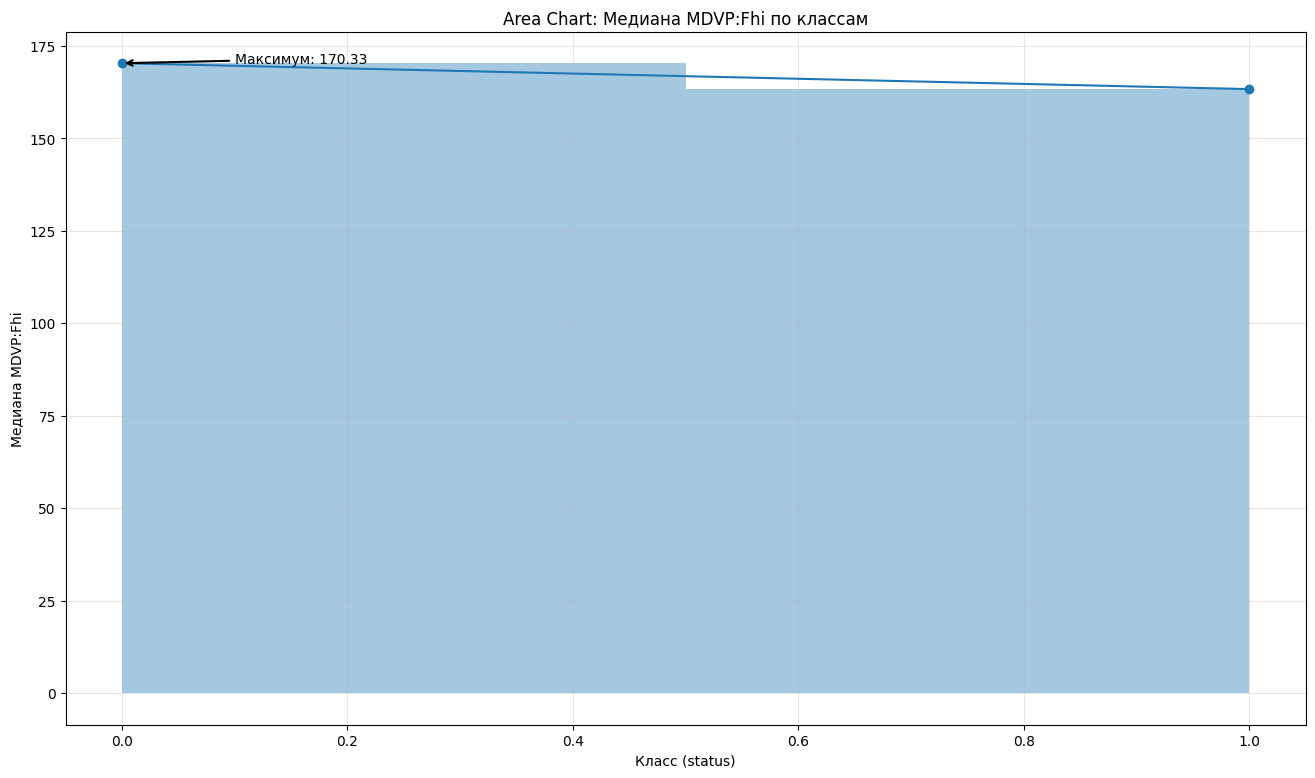

In [ ]:
plt.figure(figsize=(16, 9))

plt.fill_between(median_by_class.index, median_by_class.values, alpha=0.4, step="mid")

plt.plot(median_by_class.index, median_by_class.values, marker="o")

plt.title(f"Area Chart: Медиана {feature_max_var} по классам")
plt.xlabel("Класс (status)")
plt.ylabel(f"Медиана {feature_max_var}")
plt.grid(alpha=0.3)

max_class = median_by_class.idxmax()
max_value = median_by_class.max()

plt.annotate(
    f"Максимум: {max_value:.2f}",
    xy=(max_class, max_value),
    xytext=(max_class + 0.1, max_value),
    arrowprops=dict(arrowstyle="->", lw=1.5),
)

plt.annotate(
    f": {max_value:.2f}",
    xy=(max_class, max_value),
    xytext=(max_class + 0.1, max_value),
    arrowprops=dict(arrowstyle="->", lw=1.5),
)

plt.show()

### Задание 5
___

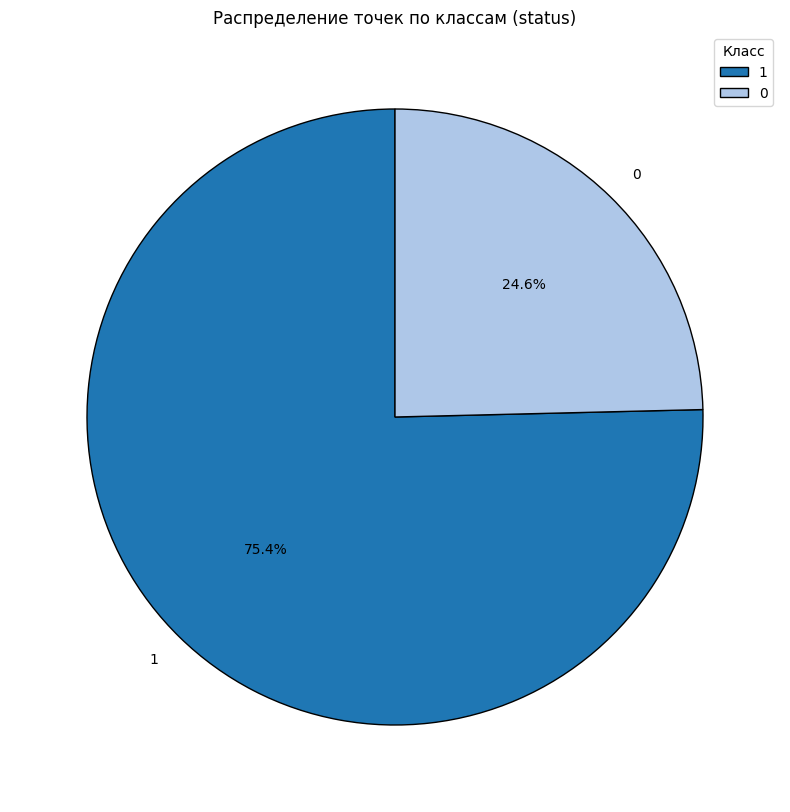

In [ ]:
class_counts = data["status"].value_counts()
classes = class_counts.index
counts = class_counts.values

colors = plt.cm.tab20.colors[: len(classes)]

plt.figure(figsize=(10, 10))
plt.pie(
    counts,
    labels=classes,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "black"},
)

plt.title("Распределение точек по классам (status)")
plt.legend(title="Класс", labels=classes, loc="upper right")
plt.show()

### задание 6
___

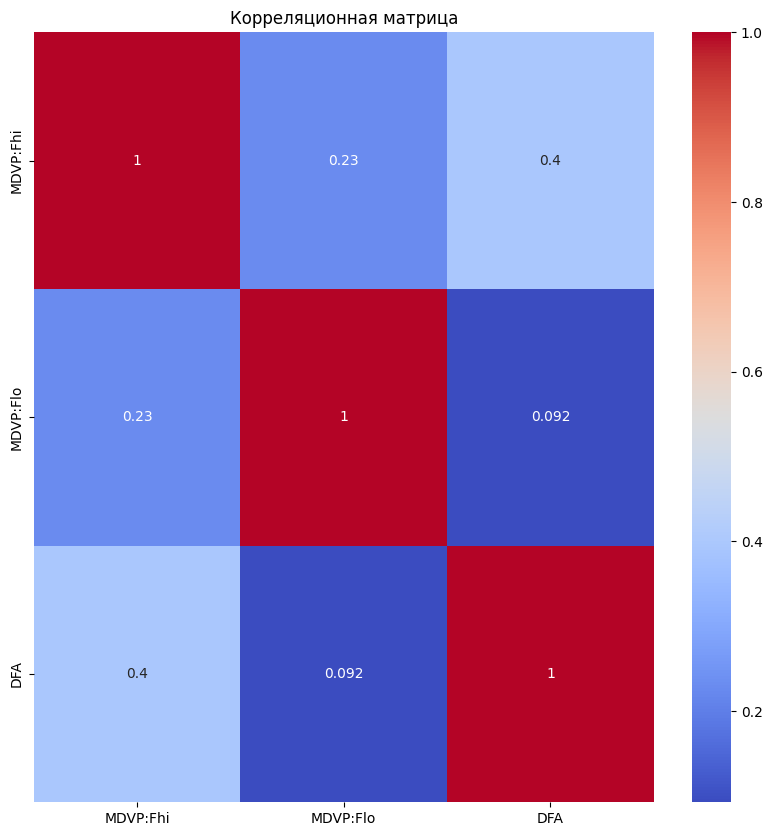

In [ ]:
corr = data[["MDVP:Fhi", "MDVP:Flo", "DFA"]].corr().abs()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

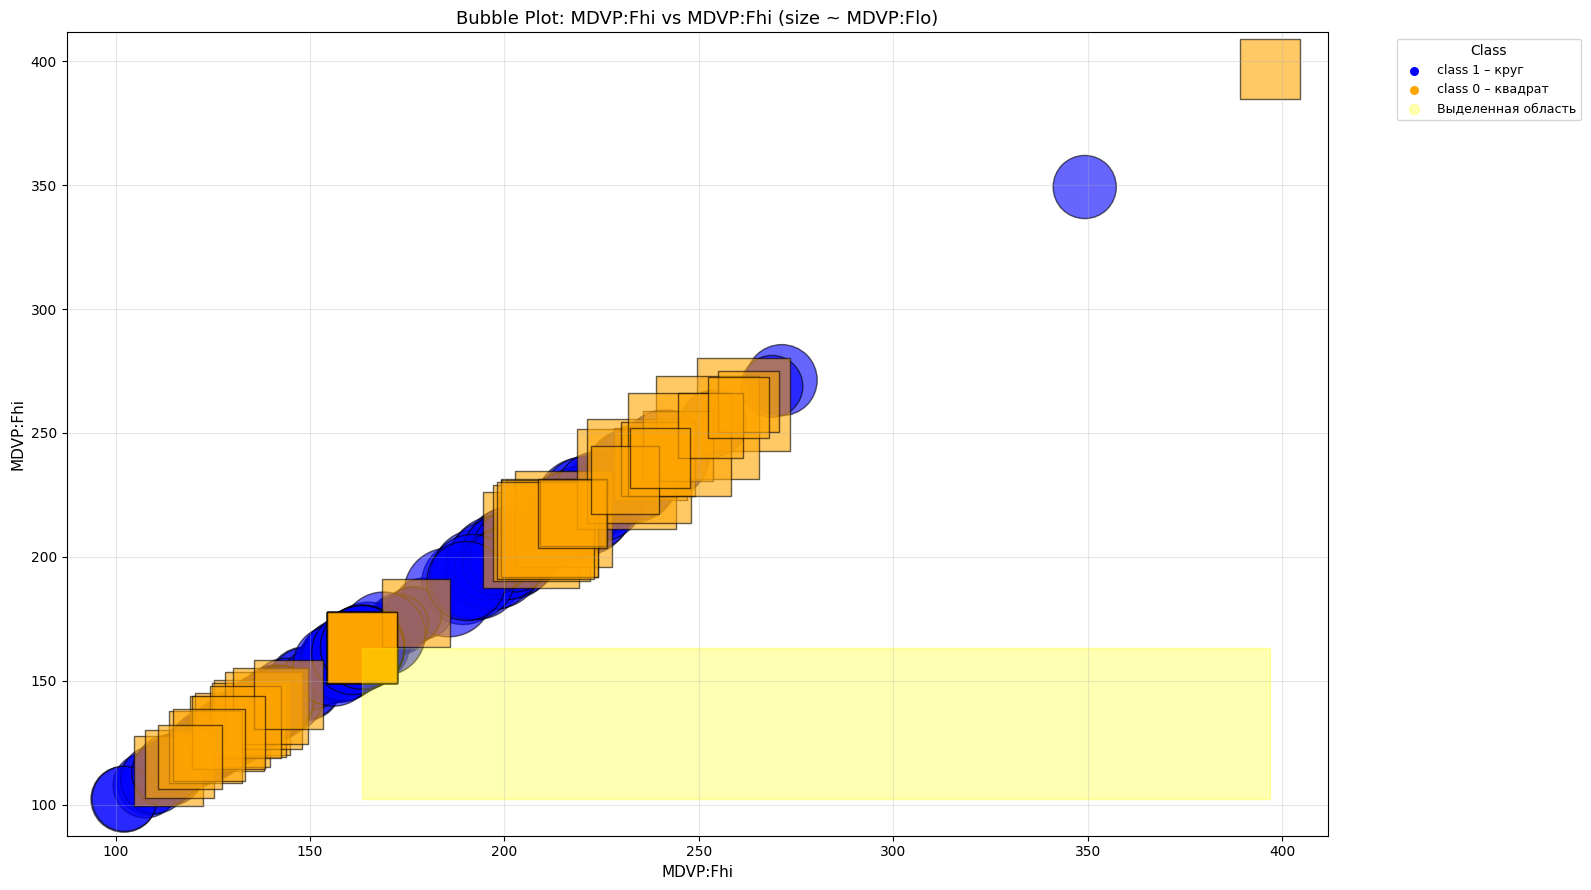

In [ ]:
corr_values = corr.where(~np.eye(corr.shape[0], dtype=bool))
x_idx, y_idx = np.unravel_index(np.argmax(corr_values.values), corr_values.shape)
x_feature = features[x_idx]
y_feature = features[y_idx]
size_feature = [f for f in features if f not in [x_feature, y_feature]][0]

classes = data["status"].unique()
colors = ["blue", "orange"]
markers = ["o", "s"]

plt.figure(figsize=(16, 9))

for cls, color, marker in zip(classes, colors, markers):
    subset = data[data["status"] == cls]
    plt.scatter(
        subset[x_feature],
        subset[y_feature],
        s=subset[size_feature] * 25,
        alpha=0.6,
        c=color,
        marker=marker,
        edgecolors="black",
        label=None,
    )

x_min = data[x_feature].median()
x_max = data[x_feature].max()
y_min = data[y_feature].min()
y_max = data[y_feature].median()

plt.fill_between(
    [x_min, x_max],
    y_min,
    y_max,
    color="yellow",
    alpha=0.3,
)

plt.xlabel(x_feature, fontsize=11)
plt.ylabel(y_feature, fontsize=11)
plt.title(
    f"Bubble Plot: {x_feature} vs {y_feature} (size ~ {size_feature})", fontsize=13
)
plt.grid(alpha=0.3)

marker_type_map = {"o": "круг", "s": "квадрат"}

for cls, color, marker in zip(classes, colors, markers):
    plt.scatter([], [], c=color, s=30, label=f"class {cls} – {marker_type_map[marker]}")

plt.scatter([], [], c="yellow", s=50, alpha=0.3, label="Выделенная область")

plt.legend(
    title="Class",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=9,
    title_fontsize=10,
)
plt.tight_layout()
plt.show()